In [ ]:
# # #                                # # #
#                                        #
# This file is tagged: [WORK IN PROGESS] #
#                                        #
# # #                                # # #

To do:
1. Explanations, conjectures, and conclusions on data/distributions
2. Additional plots? Bivariate analysis? Planning to view data from other perspectives in other notebooks (by year, by county, by associated occurrence/no occurrence)
3. Expand dataset to consider 2000-2022, consider more factors

# Initialization

In [1]:
# Navigate to root dir to import custom module "const.py"
import sys
import os
os.chdir("../")
sys.path.append(os.getcwd())
# # #
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
import numpy as np
import const as const


In [2]:
df_precip = pd.read_csv("./data/datasets/Oregon_Precipitation.csv", sep = ',', header = 0)
df_temp = pd.read_csv("./data/datasets/Oregon_Temperature_Mean.csv", sep = ',', header = 0)
df_wildfire = pd.read_csv("./data/datasets/Oregon_Fire_Incidence.csv", sep = ',', header = 0)

# Precipitation Data

In [3]:
dict_precip_month = {}

for i in range(1, 13):
  # Query dataset for rows matching the i'th month, retrieve the precipitation data, and add to the dictionary as a series
  dict_precip_month[i] = pd.Series(df_precip.query("Month == {}".format(i))["Precipitation"].to_numpy())

## Statistics

In [4]:
# Calculate mean, median, and mode for each month
df_stats_precip = pd.DataFrame({ "Mean": [np.around(m.mean(), 3) for m in dict_precip_month.values()],
                                 "Median": [np.around(m.median(), 3) for m in dict_precip_month.values()],
                                 "Mode": [np.around(m.mode().iloc[0], 3) for m in dict_precip_month.values()] }).T
df_stats_precip.columns = const.month_list

df_stats_precip

,January,February,March,April,May,June,July,August,September,October,November,December
Mean,6.168,4.428,4.974,3.552,2.597,1.699,0.348,0.499,1.435,3.564,5.729,7.330
Median,4.265,3.400,3.615,2.735,2.140,1.405,0.230,0.270,0.900,2.345,3.730,5.425
Mode,2.180,1.140,0.600,0.590,1.040,0.560,0.010,0.040,0.010,0.700,0.840,2.120


In [5]:
df_stats_precip = pd.DataFrame([m.to_list() for m in dict_precip_month.values()]).T
df_stats_precip.columns = const.month_list

df_stats_precip.describe(percentiles = [0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]).T

,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
January,828.0,6.168406,5.263871,0.20,0.5527,0.8135,2.0675,4.265,9.1900,16.6365,22.1403,27.97
February,828.0,4.427572,3.835874,0.10,0.2900,0.5500,1.4000,3.400,6.3950,11.8495,16.7542,24.00
March,828.0,4.973780,4.319265,0.19,0.4208,0.7400,1.6375,3.615,6.8900,13.4420,19.2138,26.60
April,828.0,3.552210,2.707747,0.16,0.2808,0.6035,1.4800,2.735,4.9900,8.8395,12.1774,14.74
May,828.0,2.597114,1.780668,0.14,0.3300,0.5435,1.2500,2.140,3.4725,6.1100,7.8663,12.00
June,828.0,1.698599,1.248456,0.03,0.0600,0.2735,0.7700,1.405,2.2325,4.2295,5.9757,7.05
July,828.0,0.347609,0.372790,0.00,0.0000,0.0100,0.0800,0.230,0.4700,1.0730,1.6973,2.38
August,828.0,0.499155,0.675227,0.00,0.0100,0.0200,0.0900,0.270,0.6425,1.5260,3.4346,5.96
September,828.0,1.434988,1.688902,0.00,0.0100,0.0500,0.3600,0.900,1.8525,4.6200,8.4490,13.11
October,828.0,3.563949,3.483796,0.09,0.2427,0.4835,1.1275,2.345,5.0425,9.4025,17.1922,25.72


## Histogram

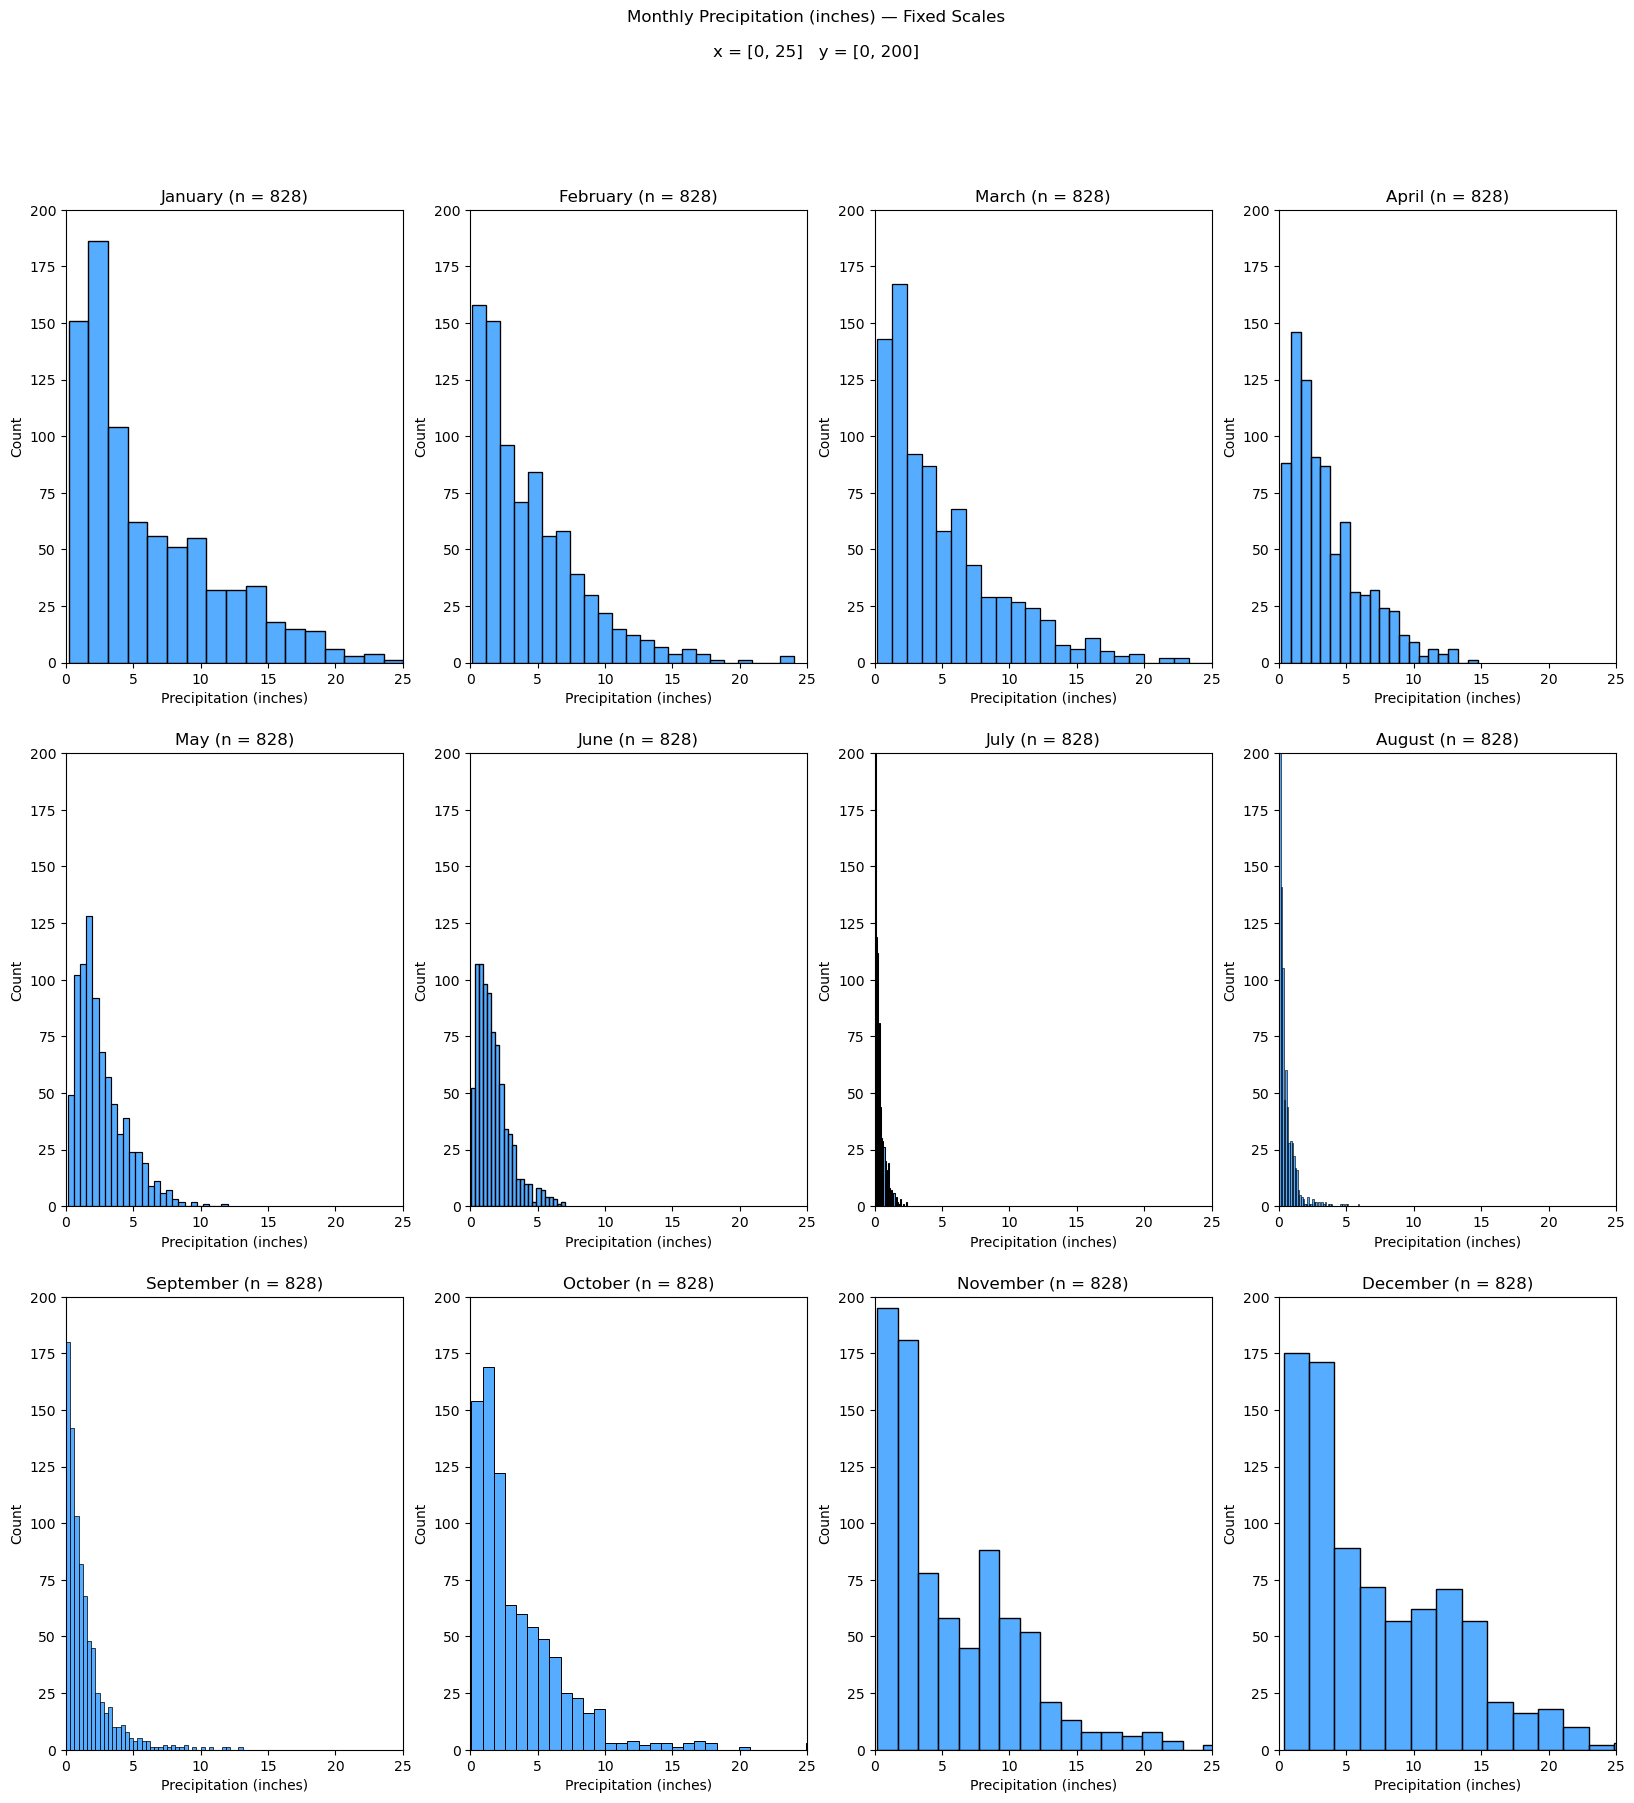

In [22]:
# Create master plot with subplots for each month of the year
plot_months_hist, ax_hist = plot.subplots(3, 4, figsize = (20, 20))
plot_months_hist.suptitle("Monthly Precipitation (inches) — Fixed Scales\n\nx = [0, 25]   y = [0, 200]")

j = k = 0
for i in range(1, 13):
  sns.histplot(ax = ax_hist[j][k], x = dict_precip_month[i], color = "dodgerblue")
  ax_hist[j][k].set_title(const.month_list[i - 1] + " (n = {})".format(len(dict_precip_month[i])))
  ax_hist[j][k].set_xlabel("Precipitation (inches)")
  ax_hist[j][k].set_xlim(0, 25)
  ax_hist[j][k].set_ylim(0, 200)

  k = i % 4
  j += 1 if k == 0 else 0

## Boxplot

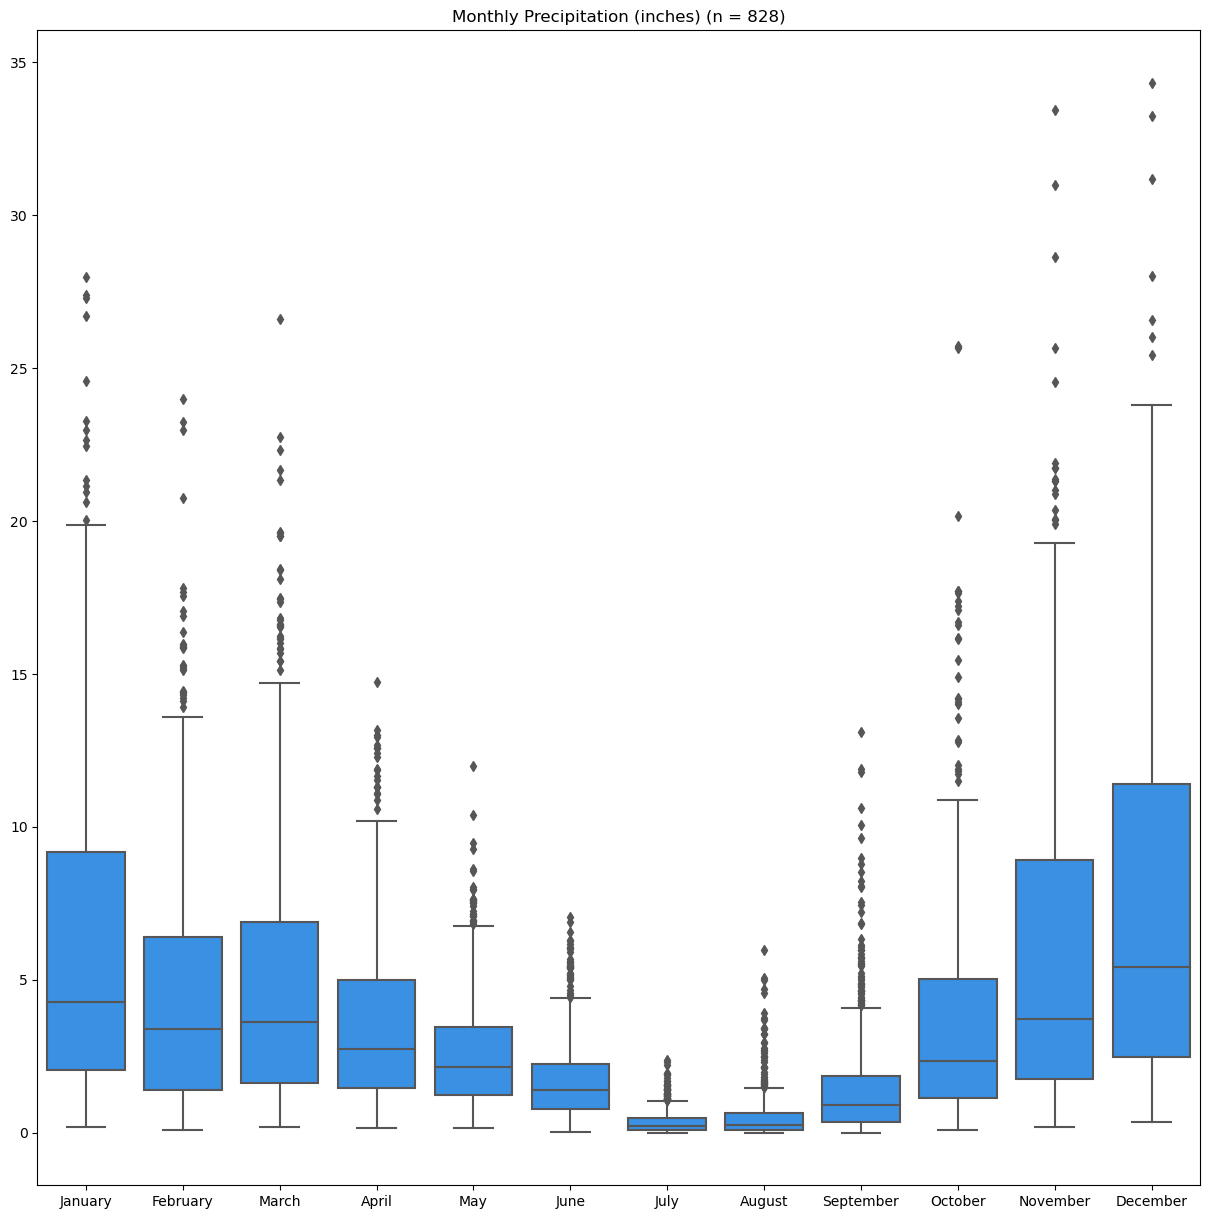

In [7]:
plot.figure(figsize = (15, 15))
ax = sns.boxplot(df_stats_precip, color = "dodgerblue")
ax.set_title("Monthly Precipitation (inches)" + " (n = {})".format(df_stats_precip["January"].count()));

# Temperature Data

In [8]:
dict_temp_month = {}

for i in range(1, 13):
  # Query dataset for rows matching the i'th month and retrieve the precipitation data
  # Collate within a matrix, flatten into a 1-D array, and add to the dictionary as a series
  dict_temp_month[i] = pd.Series(df_temp.query("Month == {}".format(i))["Temperature_Mean"].to_numpy())

## Statistics

In [9]:
# Calculate mean, median, and mode for each month
df_stats_temp = pd.DataFrame({ "Mean": [np.around(m.mean(), 3) for m in dict_temp_month.values()],
                               "Median": [np.around(m.median(), 3) for m in dict_temp_month.values()],
                               "Mode": [np.around(m.mode().iloc[0], 3) for m in dict_temp_month.values()] }).T
df_stats_temp.columns = const.month_list

df_stats_temp

,January,February,March,April,May,June,July,August,September,October,November,December
Mean,36.134,37.414,41.451,45.614,52.616,58.979,66.66,66.169,59.866,50.031,40.468,34.709
Median,36.500,38.000,41.700,46.050,53.000,58.900,66.60,66.000,60.100,50.350,40.700,34.700
Mode,34.800,37.900,43.200,48.900,54.400,61.400,64.20,64.800,60.200,51.600,38.400,39.200


In [10]:
df_stats_temp = pd.DataFrame([m.to_list() for m in dict_temp_month.values()]).T
df_stats_temp.columns = const.month_list

df_stats_temp.describe(percentiles = [0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]).T

,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
January,828.0,36.134058,5.777271,19.4,22.700,25.900,31.8,36.50,40.625,44.765,47.211,50.2
February,828.0,37.414493,5.116619,23.7,26.127,29.035,33.3,38.00,41.400,45.365,47.746,50.2
March,828.0,41.451329,4.093955,30.4,32.000,34.300,38.7,41.70,44.300,47.865,50.073,51.6
April,828.0,45.613647,3.773890,35.3,36.400,38.835,42.9,46.05,48.500,51.200,53.992,55.0
May,828.0,52.615700,3.260514,42.0,43.854,47.100,50.3,53.00,55.100,57.365,58.546,61.2
June,828.0,58.979348,3.439056,50.8,51.600,53.700,56.6,58.90,61.100,64.800,68.446,70.7
July,828.0,66.659903,3.526443,57.6,59.327,61.000,64.2,66.60,69.100,72.800,75.073,77.7
August,828.0,66.168720,2.842811,59.6,60.200,61.600,64.1,66.00,68.000,71.000,72.746,75.0
September,828.0,59.866304,2.987546,52.4,52.954,54.235,57.9,60.10,62.100,64.600,65.400,66.6
October,828.0,50.030797,3.982641,37.3,40.700,43.500,47.3,50.35,52.600,56.565,58.473,60.1


## Histogram

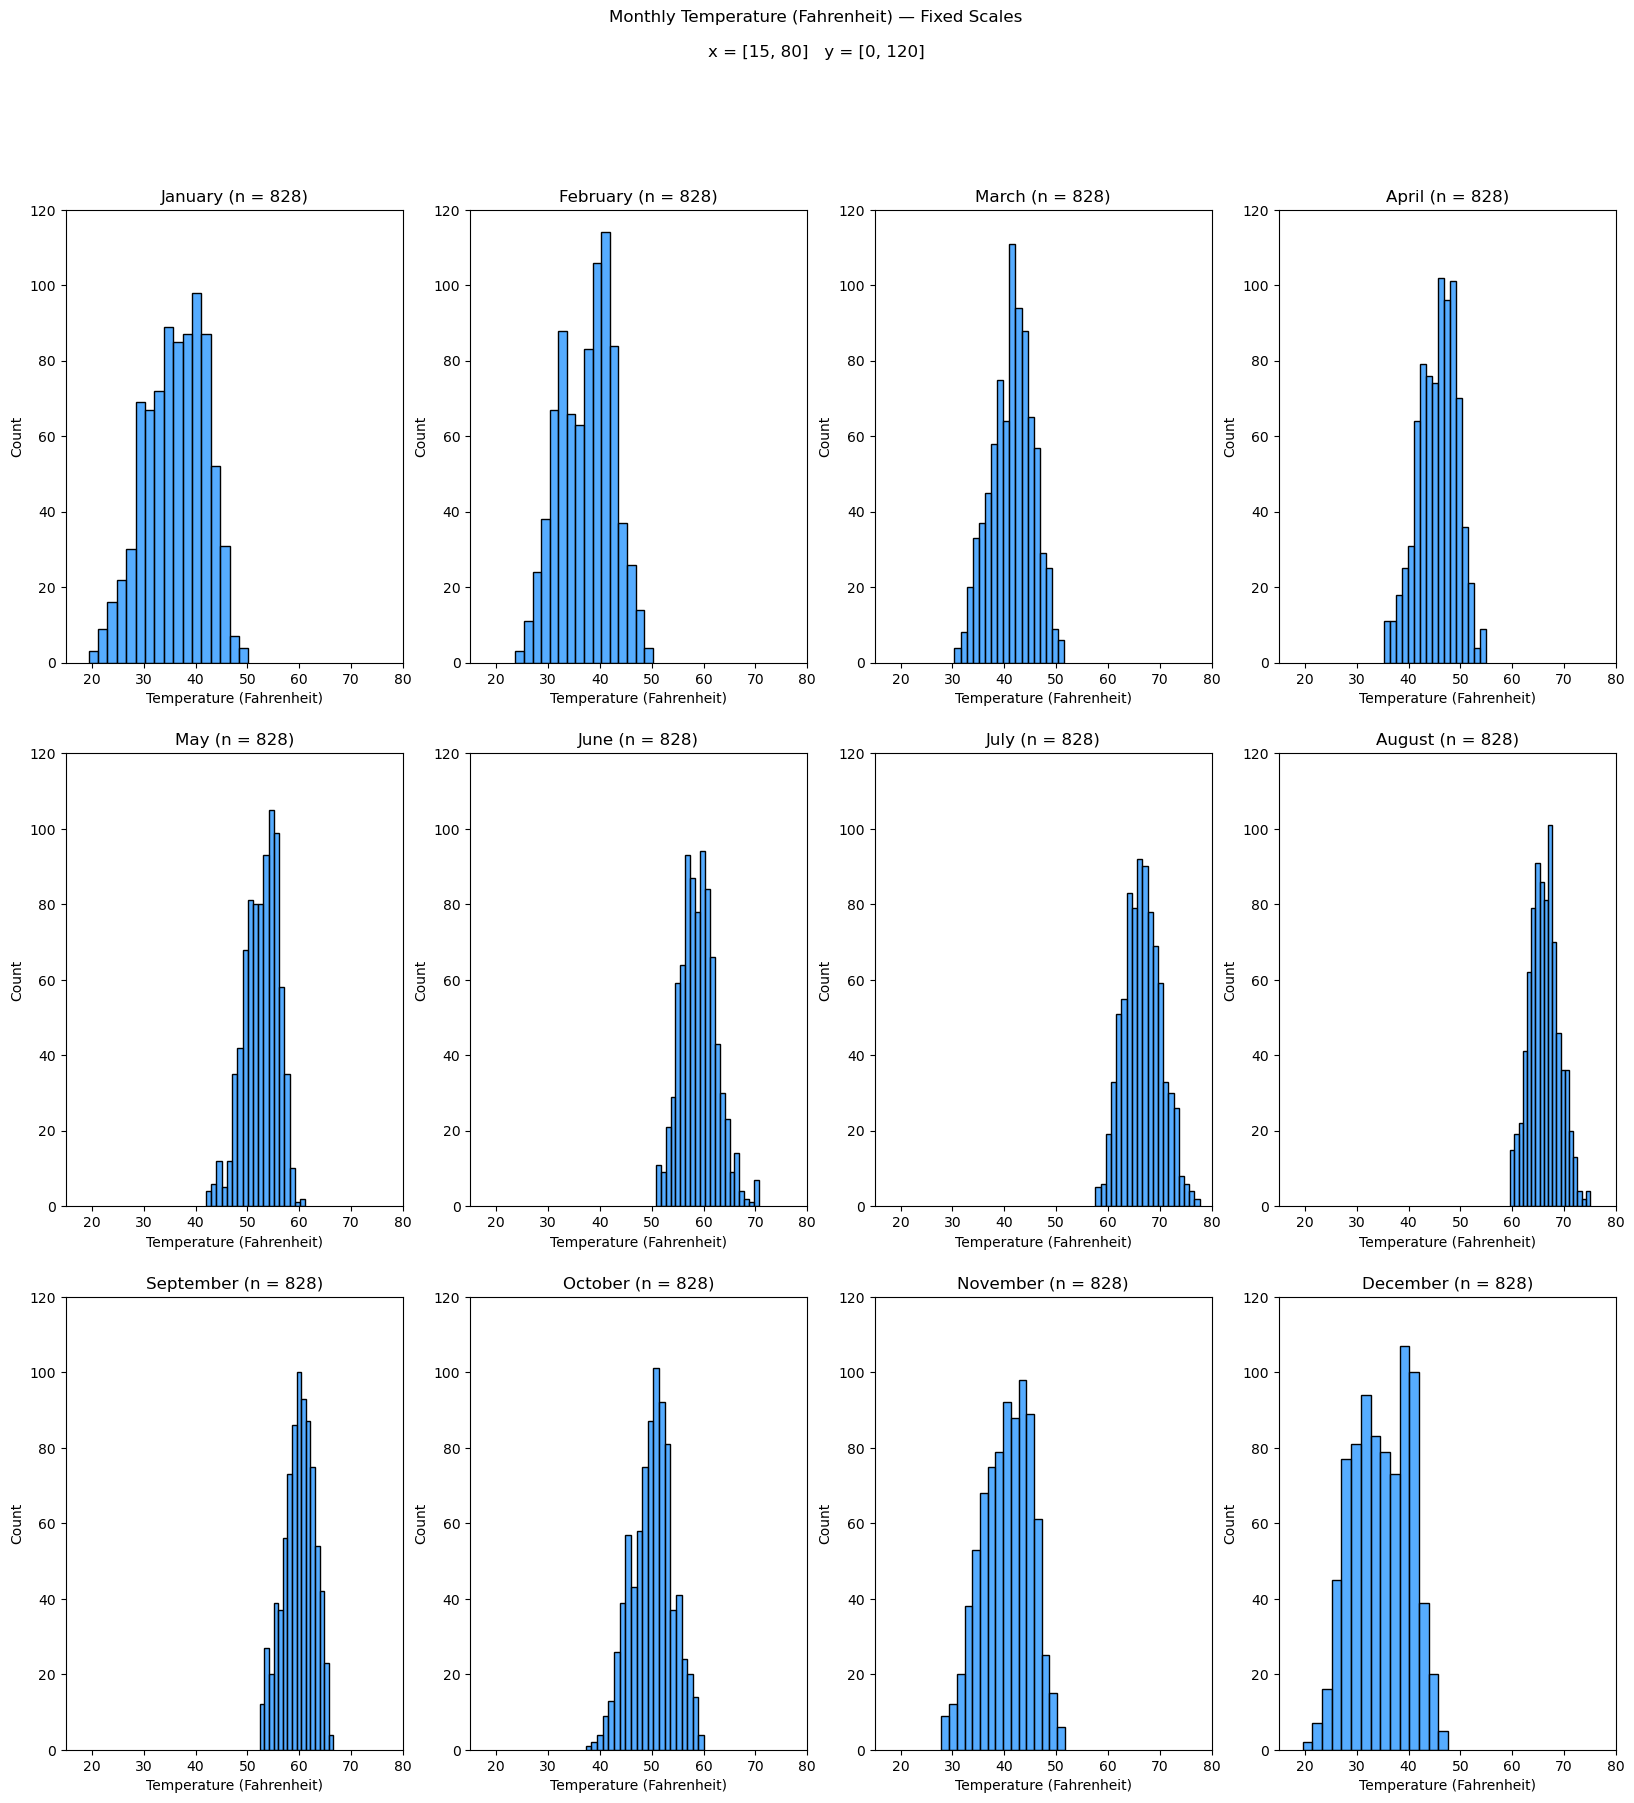

In [24]:
# Create master plot with subplots for each month of the year
plot_months_hist, ax_hist = plot.subplots(3, 4, figsize = (20, 20))
plot_months_hist.suptitle("Monthly Temperature (Fahrenheit) — Fixed Scales\n\nx = [15, 80]   y = [0, 120]")

j = k = 0
for i in range(1, 13):
  sns.histplot(ax = ax_hist[j][k], x = dict_temp_month[i], color = "dodgerblue")
  ax_hist[j][k].set_title(const.month_list[i - 1] + " (n = {})".format(len(dict_temp_month[i])))
  ax_hist[j][k].set_xlabel("Temperature (Fahrenheit)")
  ax_hist[j][k].set_xlim(15, 80)
  ax_hist[j][k].set_ylim(0, 120)

  k = i % 4
  j += 1 if k == 0 else 0

## Boxplot

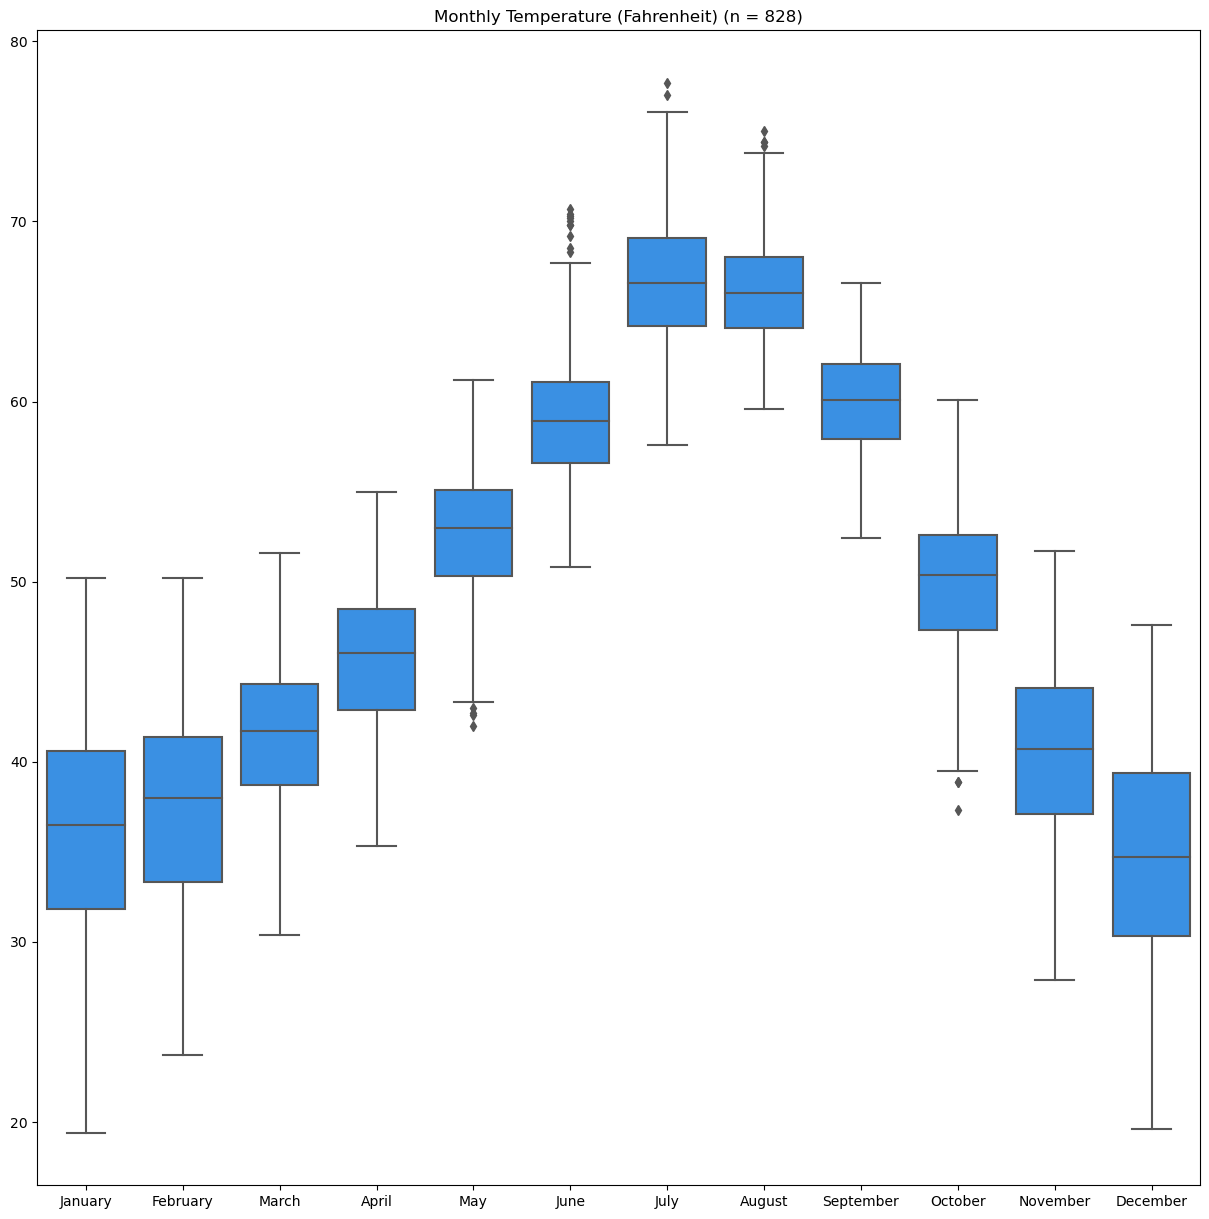

In [14]:
plot.figure(figsize = (15, 15))
ax = sns.boxplot(df_stats_temp, color = "dodgerblue")
ax.set_title("Monthly Temperature (Fahrenheit)" + " (n = {})".format(df_stats_temp["January"].count()));

# Wildfire Occurrence

[Placeholder]

## Statistics

In [15]:
df = pd.DataFrame({ "Mean": df_wildfire["Month"].mean(),
                    "Median": df_wildfire["Month"].median(),
                    "Mode": df_wildfire["Month"].mode() }).T
df.columns = ["Month"]

df

,Month
Mean,7.397202
Median,8.000000
Mode,8.000000


## Histogram

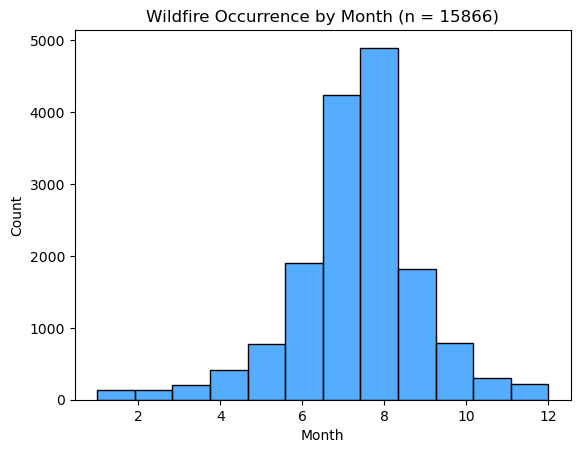

In [16]:
plot_month_hist = sns.histplot(x = df_wildfire["Month"], bins = 12, color = "dodgerblue")
plot_month_hist.set_title("Wildfire Occurrence by Month (n = {})".format(df_wildfire["Month"].count()));

## Boxplot

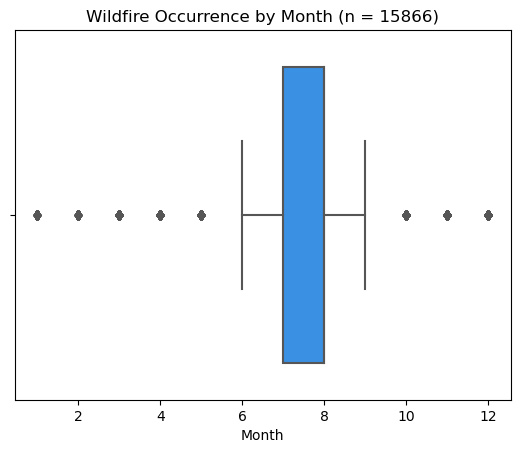

In [17]:
plot_month_boxplot = sns.boxplot(x = df_wildfire["Month"], color = "dodgerblue")
plot_month_boxplot.set_title("Wildfire Occurrence by Month (n = {})".format(df_wildfire["Month"].count()));